Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States


In [18]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import  warnings
warnings.filterwarnings("ignore") 


In [19]:
header_name=['Country','Murder','Assault','UrbanPop','Rape']
cr_data=pd.read_csv("crime_data.csv",header=None,skiprows=[0],names=header_name)
cr_data.head(10) 

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [20]:
cr_data.shape

(50, 5)

In [21]:
cr_data.info

<bound method DataFrame.info of            Country  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      

In [22]:
cr_data.columns

Index(['Country', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [23]:
cr_data.nunique()

Country     50
Murder      43
Assault     45
UrbanPop    36
Rape        48
dtype: int64

In [24]:
cr_data['Country'].unique

<bound method Series.unique of 0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46 

In [25]:
cr_data['Murder'].unique

<bound method Series.unique of 0     13.2
1     10.0
2      8.1
3      8.8
4      9.0
5      7.9
6      3.3
7      5.9
8     15.4
9     17.4
10     5.3
11     2.6
12    10.4
13     7.2
14     2.2
15     6.0
16     9.7
17    15.4
18     2.1
19    11.3
20     4.4
21    12.1
22     2.7
23    16.1
24     9.0
25     6.0
26     4.3
27    12.2
28     2.1
29     7.4
30    11.4
31    11.1
32    13.0
33     0.8
34     7.3
35     6.6
36     4.9
37     6.3
38     3.4
39    14.4
40     3.8
41    13.2
42    12.7
43     3.2
44     2.2
45     8.5
46     4.0
47     5.7
48     2.6
49     6.8
Name: Murder, dtype: float64>

In [26]:
cr_data['Assault'].unique

<bound method Series.unique of 0     236
1     263
2     294
3     190
4     276
5     204
6     110
7     238
8     335
9     211
10     46
11    120
12    249
13    113
14     56
15    115
16    109
17    249
18     83
19    300
20    149
21    255
22     72
23    259
24    178
25    109
26    102
27    252
28     57
29    159
30    285
31    254
32    337
33     45
34    120
35    151
36    159
37    106
38    174
39    279
40     86
41    188
42    201
43    120
44     48
45    156
46    145
47     81
48     53
49    161
Name: Assault, dtype: int64>

In [27]:
cr_data['UrbanPop'].unique

<bound method Series.unique of 0     58
1     48
2     80
3     50
4     91
5     78
6     77
7     72
8     80
9     60
10    83
11    54
12    83
13    65
14    57
15    66
16    52
17    66
18    51
19    67
20    85
21    74
22    66
23    44
24    70
25    53
26    62
27    81
28    56
29    89
30    70
31    86
32    45
33    44
34    75
35    68
36    67
37    72
38    87
39    48
40    45
41    59
42    80
43    80
44    32
45    63
46    73
47    39
48    66
49    60
Name: UrbanPop, dtype: int64>

In [28]:
cr_data['Rape'].unique

<bound method Series.unique of 0     21.2
1     44.5
2     31.0
3     19.5
4     40.6
5     38.7
6     11.1
7     15.8
8     31.9
9     25.8
10    20.2
11    14.2
12    24.0
13    21.0
14    11.3
15    18.0
16    16.3
17    22.2
18     7.8
19    27.8
20    16.3
21    35.1
22    14.9
23    17.1
24    28.2
25    16.4
26    16.5
27    46.0
28     9.5
29    18.8
30    32.1
31    26.1
32    16.1
33     7.3
34    21.4
35    20.0
36    29.3
37    14.9
38     8.3
39    22.5
40    12.8
41    26.9
42    25.5
43    22.9
44    11.2
45    20.7
46    26.2
47     9.3
48    10.8
49    15.6
Name: Rape, dtype: float64>

In [29]:
cr_data.isna().sum()

Country     0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [30]:
cr_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


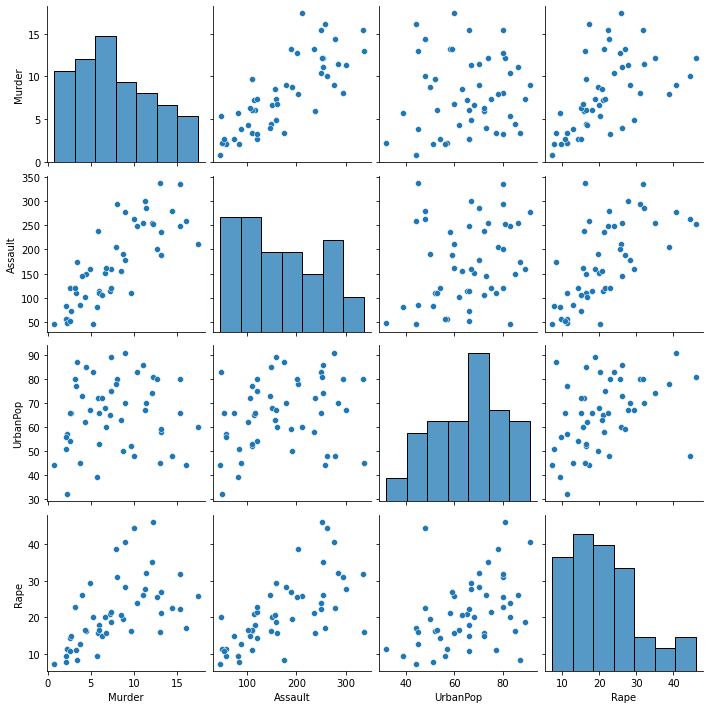

In [31]:
sns.pairplot(cr_data)

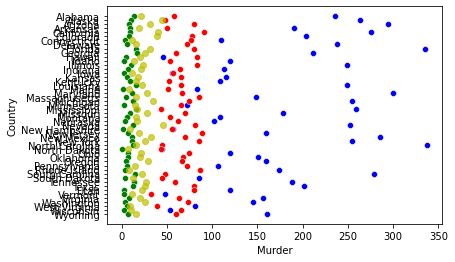

In [32]:
sns.scatterplot('Murder','Country',color='g',data=cr_data)
sns.scatterplot('Assault','Country',color='b',data=cr_data);
sns.scatterplot('UrbanPop','Country',color='r',data=cr_data);
plt.scatter(cr_data['Rape'],cr_data['Country'],color = 'y',alpha=0.7);
plt.show()

In [33]:
scaler = MinMaxScaler()
cr_data_scaled = scaler.fit_transform(cr_data.iloc[:,1:4])

In [34]:
cr_data_scaled

array([[0.74698795, 0.65410959, 0.44067797],
       [0.55421687, 0.74657534, 0.27118644],
       [0.43975904, 0.85273973, 0.81355932],
       [0.48192771, 0.49657534, 0.30508475],
       [0.4939759 , 0.79109589, 1.        ],
       [0.42771084, 0.54452055, 0.77966102],
       [0.15060241, 0.22260274, 0.76271186],
       [0.30722892, 0.6609589 , 0.6779661 ],
       [0.87951807, 0.99315068, 0.81355932],
       [1.        , 0.56849315, 0.47457627],
       [0.27108434, 0.00342466, 0.86440678],
       [0.10843373, 0.25684932, 0.37288136],
       [0.57831325, 0.69863014, 0.86440678],
       [0.38554217, 0.23287671, 0.55932203],
       [0.08433735, 0.03767123, 0.42372881],
       [0.31325301, 0.23972603, 0.57627119],
       [0.53614458, 0.21917808, 0.33898305],
       [0.87951807, 0.69863014, 0.57627119],
       [0.07831325, 0.13013699, 0.3220339 ],
       [0.63253012, 0.87328767, 0.59322034],
       [0.21686747, 0.35616438, 0.89830508],
       [0.68072289, 0.71917808, 0.71186441],
       [0.

In [35]:
cr_data1= cr_data_scaled
cr_data1

array([[0.74698795, 0.65410959, 0.44067797],
       [0.55421687, 0.74657534, 0.27118644],
       [0.43975904, 0.85273973, 0.81355932],
       [0.48192771, 0.49657534, 0.30508475],
       [0.4939759 , 0.79109589, 1.        ],
       [0.42771084, 0.54452055, 0.77966102],
       [0.15060241, 0.22260274, 0.76271186],
       [0.30722892, 0.6609589 , 0.6779661 ],
       [0.87951807, 0.99315068, 0.81355932],
       [1.        , 0.56849315, 0.47457627],
       [0.27108434, 0.00342466, 0.86440678],
       [0.10843373, 0.25684932, 0.37288136],
       [0.57831325, 0.69863014, 0.86440678],
       [0.38554217, 0.23287671, 0.55932203],
       [0.08433735, 0.03767123, 0.42372881],
       [0.31325301, 0.23972603, 0.57627119],
       [0.53614458, 0.21917808, 0.33898305],
       [0.87951807, 0.69863014, 0.57627119],
       [0.07831325, 0.13013699, 0.3220339 ],
       [0.63253012, 0.87328767, 0.59322034],
       [0.21686747, 0.35616438, 0.89830508],
       [0.68072289, 0.71917808, 0.71186441],
       [0.

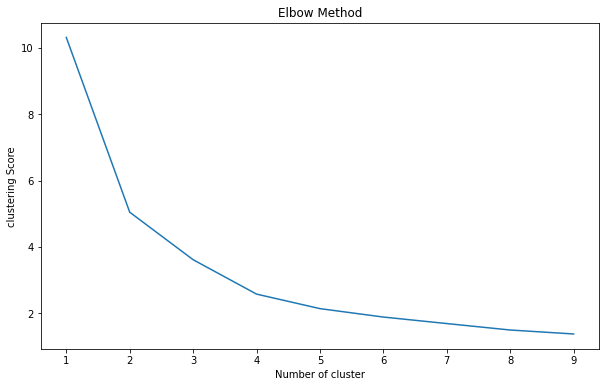

In [36]:
individual_clustering_score = []
for  i in range (1,10):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42 )
    kmeans.fit(cr_data1)
    individual_clustering_score.append(kmeans.inertia_)
    
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,10),individual_clustering_score)
plt.title('Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('clustering Score')
plt.show()

In [37]:
individual_clustering_score

[10.313883181628759,
 5.04392684500785,
 3.610894562343389,
 2.5738597207493137,
 2.1355715083228484,
 1.8819646222647788,
 1.685258134496383,
 1.4911798829630691,
 1.3713689960274364]

fit and predict the model 

In [38]:
kmeans = KMeans(n_clusters =  4 ,random_state= 42)
kmeans.fit(cr_data1)

pred = kmeans.predict(cr_data1)

pred

array([2, 2, 3, 2, 3, 0, 0, 0, 3, 2, 0, 1, 3, 0, 1, 0, 1, 2, 1, 3, 0, 3,
       1, 2, 0, 1, 1, 3, 1, 0, 3, 3, 2, 1, 0, 0, 0, 0, 0, 2, 1, 2, 3, 0,
       1, 0, 0, 1, 1, 0])

In [39]:
 cr_data['cluster']= pd.DataFrame(pred,columns= ['cluster'])

In [40]:
cr_data['cluster'].value_counts()

0    18
1    13
3    10
2     9
Name: cluster, dtype: int64

In [41]:
cr_data[cr_data['cluster']==0]

,Country,Murder,Assault,UrbanPop,Rape,cluster
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
20,Massachusetts,4.4,149,85,16.3,0
24,Missouri,9.0,178,70,28.2,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [42]:
cr_data[cr_data['cluster']==1]

,Country,Murder,Assault,UrbanPop,Rape,cluster
11,Idaho,2.6,120,54,14.2,1
14,Iowa,2.2,56,57,11.3,1
16,Kentucky,9.7,109,52,16.3,1
18,Maine,2.1,83,51,7.8,1
22,Minnesota,2.7,72,66,14.9,1
25,Montana,6.0,109,53,16.4,1
26,Nebraska,4.3,102,62,16.5,1
28,New Hampshire,2.1,57,56,9.5,1
33,North Dakota,0.8,45,44,7.3,1
40,South Dakota,3.8,86,45,12.8,1


In [43]:
cr_data[cr_data['cluster']==2]

,Country,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,2
3,Arkansas,8.8,190,50,19.5,2
9,Georgia,17.4,211,60,25.8,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
32,North Carolina,13.0,337,45,16.1,2
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2


In [44]:
cr_data[cr_data['cluster']==3]

,Country,Murder,Assault,UrbanPop,Rape,cluster
2,Arizona,8.1,294,80,31.0,3
4,California,9.0,276,91,40.6,3
8,Florida,15.4,335,80,31.9,3
12,Illinois,10.4,249,83,24.0,3
19,Maryland,11.3,300,67,27.8,3
21,Michigan,12.1,255,74,35.1,3
27,Nevada,12.2,252,81,46.0,3
30,New Mexico,11.4,285,70,32.1,3
31,New York,11.1,254,86,26.1,3
42,Texas,12.7,201,80,25.5,3


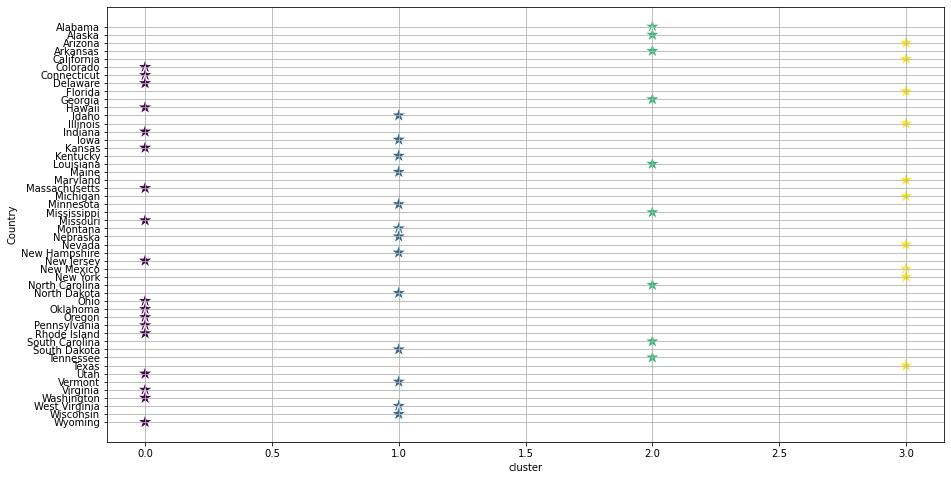

In [45]:
plt.figure(figsize=(15,8))
sns.scatterplot(cr_data['cluster'],cr_data['Country'],c=kmeans.labels_,s=300,marker='*') 
plt.grid()
plt.show(); 